In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [84]:
dataset = pd.read_csv("Cleaned_Data.csv")

/Users/pranavkrishnan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [85]:
dataset.head()

,name_x,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,...,ios_lib_version,ae_first_app_open_date,active_timespan,average_session_time,country,US,Facebook,Foodie,Google,Unknown
0,$ae_session,Gh@g.com_5858,2019-08-19 21:47:54.000000,179.7,Bengaluru,Karnataka,IN,1,0,NaN,...,NaN,NaN,NaN,NaN,INTL,0,0,0,0,0
1,$ae_session,A5C759A6-9FE5-4071-9D0A-4B91C61F63BD,2020-01-12 07:35:29.000000,16.3,Pasadena,California,US,1,0,NaN,...,NaN,NaN,NaN,NaN,US,1,0,0,0,0
2,Search - Change Section,4E1A70A0-C2DB-46EB-A9C8-B4F0B0815771,2020-01-12 16:36:27.000000,NaN,Kyiv,Kyiv City,UA,1,0,NaN,...,3.4.9,2019-11-21 11:58:17+00:00,119 days 05:44:04.000000000,203.72842,INTL,0,1,0,0,0
3,Onboarding - Allow Location,C9434897-9F99-4D5F-B9D3-A3E8DAFC0B74,2020-01-12 16:36:44.000000,NaN,Mill Valley,California,US,1,1,NaN,...,NaN,NaN,NaN,NaN,US,1,0,0,0,0
4,$ae_session,4E1A70A0-C2DB-46EB-A9C8-B4F0B0815771,2020-01-12 16:40:32.000000,106.7,Kyiv,Kyiv City,UA,1,1,NaN,...,3.4.9,2019-11-21 11:58:17+00:00,119 days 05:44:04.000000000,203.72842,INTL,0,1,0,0,0


In [86]:
dataset['active_timespan'] = pd.to_datetime(dataset['last_seen']) - pd.to_datetime(dataset['ae_first_app_open_date'])

In [87]:
dataset[['distinct_id','ae_total_app_sessions']][dataset['distinct_id'] == 'DB387857-02A8-4BBF-B299-450EDB8C9560']['ae_total_app_sessions'].value_counts()

Series([], Name: ae_total_app_sessions, dtype: int64)

In [91]:
app_sessions_timespan = dataset[['distinct_id','ae_total_app_sessions']][-dataset['ae_total_app_sessions'].isnull()]
app_sessions_timespan

,distinct_id,ae_total_app_sessions,active_timespan,ae_first_app_open_date
2,4E1A70A0-C2DB-46EB-A9C8-B4F0B0815771,3012.0,119 days 05:44:04,2019-11-21 11:58:17+00:00
4,4E1A70A0-C2DB-46EB-A9C8-B4F0B0815771,3012.0,119 days 05:44:04,2019-11-21 11:58:17+00:00
5,4E1A70A0-C2DB-46EB-A9C8-B4F0B0815771,3012.0,119 days 05:44:04,2019-11-21 11:58:17+00:00
6,4E1A70A0-C2DB-46EB-A9C8-B4F0B0815771,3012.0,119 days 05:44:04,2019-11-21 11:58:17+00:00
7,4E1A70A0-C2DB-46EB-A9C8-B4F0B0815771,3012.0,119 days 05:44:04,2019-11-21 11:58:17+00:00
...,...,...,...,...
190347,vaibhavverma9@uchicago.edu_56,2621.0,NaT,NaN
190348,vaibhavverma9@uchicago.edu_56,2621.0,NaT,NaN
190349,vaibhavverma9@uchicago.edu_56,2621.0,NaT,NaN
190353,vaibhavverma9@uchicago.edu_56,2621.0,NaT,NaN


In [94]:
app_sessions_timespan[app_sessions_timespan['ae_first_app_open_date'].isnull()]['distinct_id'].value_counts()

nb@gmail.com_93                  18347
richard.z.wu@gmail.com_136        6437
vaibhavverma9@uchicago.edu_56     5482
mai.nabar@gmail.com_104           3200
hr@gmail.com_87                   2170
d2baa8a36ca0137d                  1984
Dzavala@uchicago.edu_118          1895
eemilyshenn@gmail.com_227         1472
scao21@uchicago.edu_116           1176
jeencall@yahoo.com_248             713
spatel@gmail.com_53                656
harshil1088@gmail.com_51           528
andrewjabara@gmail.com_311         437
rickeatsdc@gmail.com_6802          279
arvindverma5@gmail.com_67          126
girlsrule728@gmail.com_180         109
addidas23@gmail.com_139             94
ca8jessica17@gmail.com_277          69
rebeccaqian@uchicago.edu_271        64
hgiovannelli@uchicago.edu_308       59
psteelers10@gmail.com_238           55
surelyfoodhere@gmail.com_318        46
cj96n@hotmail.com_181               33
jamesyoungny@gmail.com_152          32
a.road100@gmail.com_199             25
joefennessey23@yahoo.com_

In [89]:
id_sessions = app_sessions_timespan.groupby('distinct_id').agg(np.mean)
id_sessions

,ae_total_app_sessions
distinct_id,
04ADA4C3-9212-49DA-B600-67A8403D69C3,45.0
054528AB-F5A3-4C47-A572-A32F9D57C9D1,41.0
06734B33-C7EE-4CA7-9643-7C27BB6B509F,45.0
09353F2A-56B0-4BF8-B532-C8B9B25BCC80,66.0
0A9EAE40-440D-4292-91CE-1817EC1C5E82,62.0
...,...
scao21@uchicago.edu_116,914.0
spatel@gmail.com_53,626.0
surelyfoodhere@gmail.com_318,54.0


(array([116.,   3.,   2.,   2.,   1.,   0.,   2.,   2.,   1.,   2.]),
 array([  31. ,  385.9,  740.8, 1095.7, 1450.6, 1805.5, 2160.4, 2515.3,
        2870.2, 3225.1, 3580. ]),
 <a list of 10 Patch objects>)

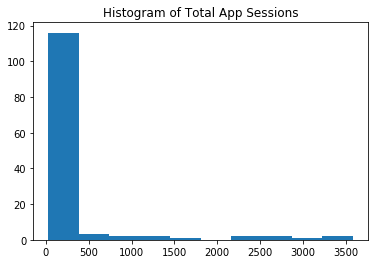

In [41]:
plt.title('Histogram of Total App Sessions')
plt.hist(id_sessions['ae_total_app_sessions'])

(array([27., 21., 20., 11.,  4.,  4.,  3.,  1.,  3.,  5.,  3.,  4.,  0.,
         1.,  3.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([ 30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120., 130.,
        140., 150., 160., 170., 180., 190., 200., 210., 220., 230., 240.,
        250., 260., 270., 280., 290., 300., 310., 320., 330., 340., 350.,
        360., 370., 380., 390., 400., 410., 420., 430., 440., 450., 460.,
        470., 480., 490., 500.]),
 <a list of 47 Patch objects>)

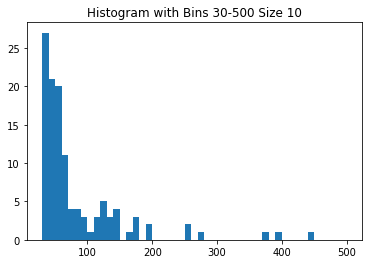

In [60]:
plt.title('Histogram with Bins 30-500 Size 10')
plt.hist(id_sessions['ae_total_app_sessions'], bins=np.linspace(30, 500, 48))

In [107]:
timespan = dataset[['distinct_id', 'active_timespan', 'ae_first_app_open_date']][-dataset['ae_first_app_open_date'].isnull()]

In [108]:
timespan['active_timespan'] = [elem.total_seconds() for elem in timespan['active_timespan']]
# id_timespan = timespan.groupby('active_timespan').agg(np.mean)


In [109]:
id_timespan = timespan.groupby('distinct_id').agg(np.mean)

In [118]:
id_timespan_sessions = id_timespan.merge(id_sessions, how='inner', left_index=True, right_index=True)
id_timespan_sessions['active_timespan'] = id_timespan_sessions['active_timespan'] / (60 * 60 * 24)

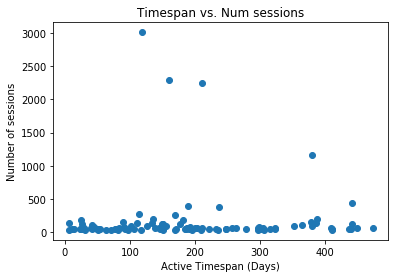

In [120]:
plt.xlabel('Active Timespan (Days)')
plt.ylabel('Number of sessions')
plt.title('Timespan vs. Num sessions')
plt.scatter(id_timespan_sessions['active_timespan'], id_timespan_sessions['ae_total_app_sessions'])

In [121]:
id_timespan_sessions['sessions_per_day'] = id_timespan_sessions['ae_total_app_sessions'] / id_timespan_sessions['active_timespan']
id_timespan_sessions

,active_timespan,ae_total_app_sessions,sessions_per_day
distinct_id,,,
04ADA4C3-9212-49DA-B600-67A8403D69C3,221.477315,45.0,0.203181
054528AB-F5A3-4C47-A572-A32F9D57C9D1,436.118981,41.0,0.094011
06734B33-C7EE-4CA7-9643-7C27BB6B509F,411.351875,45.0,0.109395
09353F2A-56B0-4BF8-B532-C8B9B25BCC80,82.396042,66.0,0.801009
0A9EAE40-440D-4292-91CE-1817EC1C5E82,28.926169,62.0,2.143388
...,...,...,...
F8B626E6-C04A-450B-8736-2769C564A03C,49.483993,42.0,0.848759
FC9EF9C7-23BA-4B05-93EC-CC18F95EDEC1,378.970162,143.0,0.377338
FE221C6D-8605-42E4-9249-2E8420994F1B,169.346921,31.0,0.183056


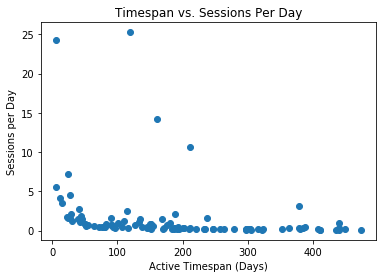

In [122]:
plt.xlabel('Active Timespan (Days)')
plt.ylabel('Sessions per Day')
plt.title('Timespan vs. Sessions Per Day')
plt.scatter(id_timespan_sessions['active_timespan'], id_timespan_sessions['sessions_per_day'])